In [7]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.set_random_seed(42)

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


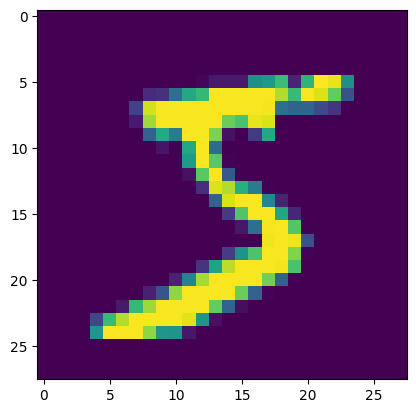

Label: 5


In [9]:
import matplotlib.pyplot as plt
#plt.imshow(x_train[0], cmap = 'gray')
plt.imshow(x_train[0])
plt.show()
print(f'Label: {y_train[0]}')

In [10]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [11]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
input_shape = (28,28,1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
batch_size = 128
epochs = 15

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7536 - loss: 0.8070 - val_accuracy: 0.9707 - val_loss: 0.0997
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9615 - loss: 0.1271 - val_accuracy: 0.9802 - val_loss: 0.0694
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9710 - loss: 0.0919 - val_accuracy: 0.9835 - val_loss: 0.0590
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9760 - loss: 0.0762 - val_accuracy: 0.9852 - val_loss: 0.0529
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9796 - loss: 0.0648 - val_accuracy: 0.9859 - val_loss: 0.0478
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9806 - loss: 0.0633 - val_accuracy: 0.9868 - val_loss: 0.0460
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9819 - loss: 0.0553 - val_accuracy: 0.9887 - val_loss: 0.0414
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9848 - loss: 0.0492 - v

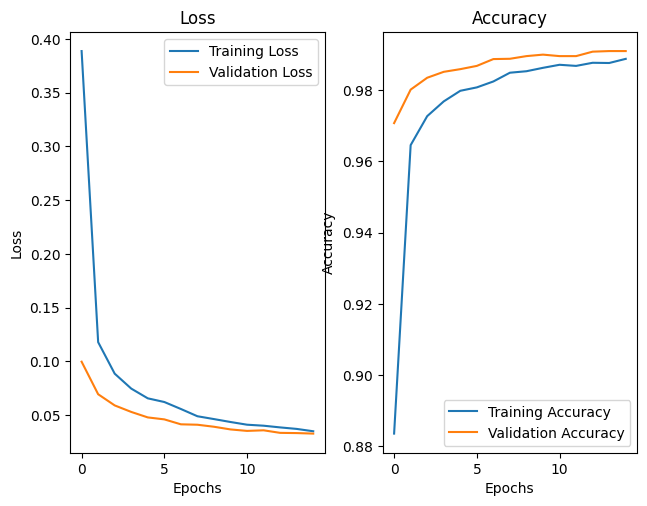

In [16]:
def plot_performance(history):
    flg, ax = plt.subplots(1,2)
    flg.tight_layout()
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss')
    ax[0].plot(train_loss, label='Training Loss')
    ax[0].plot(val_loss, label='Validation Loss')
    ax[0].legend()
    
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy')
    ax[1].plot(train_acc, label='Training Accuracy')
    ax[1].plot(val_acc, label='Validation Accuracy')
    ax[1].legend()

    plt.show()

plot_performance(history)

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.02587532065808773
Test accuracy 0.9918000102043152


very good performance with loss and accuracy

In [ ]:
model_smallest = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        #layers.MaxPooling2D(pool_size=(28,28)),
        layers.AveragePooling2D(pool_size=(28,28)),
        layers.Flatten(), # to prepare the full connect next layers
        layers.Dense(num_classes, activation='softmax')
    ]
)

model_smallest.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ average_pooling2d               │ (None, 1, 1, 1)        │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_smallest.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_smallest = model_smallest.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1274 - loss: 2.2996 - val_accuracy: 0.1873 - val_loss: 2.2956
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1764 - loss: 2.2933 - val_accuracy: 0.1718 - val_loss: 2.2914
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1729 - loss: 2.2887 - val_accuracy: 0.1721 - val_loss: 2.2874
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1755 - loss: 2.2845 - val_accuracy: 0.1749 - val_loss: 2.2835
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1790 - loss: 2.2805 - val_accuracy: 0.1768 - val_loss: 2.2797
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1814 - loss: 2.2766 - val_accuracy: 0.1781 - val_loss: 2.2760
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1833 - loss: 2.2729 - val_accuracy: 0.1794 - val_loss: 2.2724
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1850 - loss: 2.2692 - val_accuracy: 0.

In [ ]:
score = model_smallest.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 2.243715524673462
Test accuracy 0.18889999389648438
